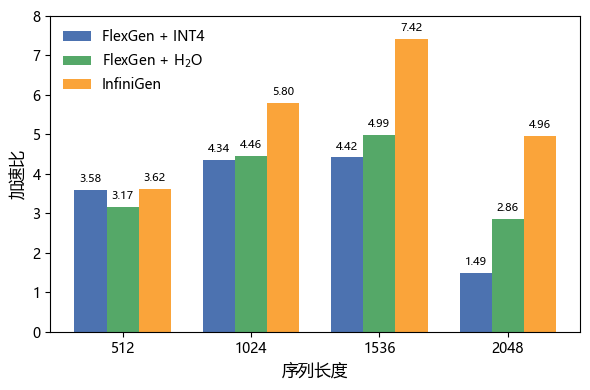

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# 设置字体为微软雅黑
rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 中文字体
rcParams['axes.unicode_minus'] = False  # 避免负号显示为方块

# 定义函数以从文件中提取数据
def extract_data_from_log(file_path):
    data = {
        "FlexGen": [],
        "FlexGen + INT4": [],
        "FlexGen + H2O": [],
        "InfiniGen (Ours)": []
    }
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for i in range(len(lines)):
            if 'Total' in lines[i]:
                # 提取标签
                current_key = lines[i - 3].strip()
                # 提取数值
                total = float(lines[i].split(":")[1].split()[0])  # 只提取 Total 的数值部分
                data[current_key].append(total)

    return data

# 读取日志文件内容
log_file_path = "log"  # 替换为您的日志文件路径

# 提取数据
data = extract_data_from_log(log_file_path)

# 数据定义
sequence_lengths = ['512', '1024', '1536', '2048']  # 序列长度
flexgen = data["FlexGen"]  # FlexGen 数据
flexgen_int4 = data["FlexGen + INT4"]  # FlexGen + INT4 数据
flexgen_h2o = data["FlexGen + H2O"]  # FlexGen + H2O 数据
infinigen = data["InfiniGen (Ours)"]  # InfiniGen 数据

# 计算相对于 FlexGen 的加速倍数
speedup_int4 = [flexgen[i] / flexgen_int4[i] for i in range(len(flexgen))]
speedup_h2o = [flexgen[i] / flexgen_h2o[i] for i in range(len(flexgen))]
speedup_infinigen = [flexgen[i] / infinigen[i] for i in range(len(flexgen))]

x = np.arange(len(sequence_lengths))  # X轴位置
width = 0.25  # 柱状图宽度

# 创建图形
fig, ax = plt.subplots(figsize=(6,4))

# 绘制柱状图
bar1 = ax.bar(x - width, speedup_int4, width, label='FlexGen + INT4', color='#4C72B0')  # 蓝色柱状图
bar2 = ax.bar(x, speedup_h2o, width, label='FlexGen + H$_2$O', color='#55A868')  # 绿色柱状图
bar3 = ax.bar(x + width, speedup_infinigen, width, label='InfiniGen', color='#FAA43A')  # 橙色柱状图

# 添加标签、标题和图例
ax.set_ylabel('加速比', fontsize=12)
ax.set_xlabel('序列长度', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(sequence_lengths, fontsize=10)
ax.legend(fontsize=10, loc='upper left', frameon=False)
ax.set_ylim(0, 8)  # 设置Y轴范围

# 添加标注
for i, v in enumerate(speedup_int4):
    ax.text(x[i] - width, v + 0.2, f'{v:.2f}', ha='center', fontsize=8)
for i, v in enumerate(speedup_h2o):
    ax.text(x[i], v + 0.2, f'{v:.2f}', ha='center', fontsize=8)
for i, v in enumerate(speedup_infinigen):
    ax.text(x[i] + width, v + 0.2, f'{v:.2f}', ha='center', fontsize=8)

# 优化布局
plt.tight_layout()

# 显示图形
plt.show()
fig.savefig('16a.pdf', bbox_inches='tight')  # 保存为 PDF 文件